In [49]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
maybank = pd.read_csv('maybank (1).csv')
col = [i in maybank.columns for i in range(3)]

In [24]:
maybank = maybank[['Unnamed: 0', 'Revenue', 'Net Profit', 'Total Liabilities']]

In [25]:
maybank.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [31]:
maybank = maybank.dropna()
maybank_rev['Date'] = pd.to_datetime(maybank_rev['Date'], format='%d/%m/%Y')

C:\Users\USER\AppData\Local\Temp\ipykernel_17360\1310175969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maybank_rev['Date'] = pd.to_datetime(maybank_rev['Date'], format='%d/%m/%Y')


In [32]:
maybank_rev = maybank[['Date','Revenue']]

In [33]:
maybank_rev

,Date,Revenue
0,30/9/2019,319.5
1,30/12/2019,335.3
2,30/3/2020,323.5
3,30/6/2020,326.5
4,30/9/2020,338.7
5,30/12/2020,345.2
6,30/3/2021,323.4
7,30/6/2021,333.2
8,30/9/2021,341.3
9,30/12/2021,359.3


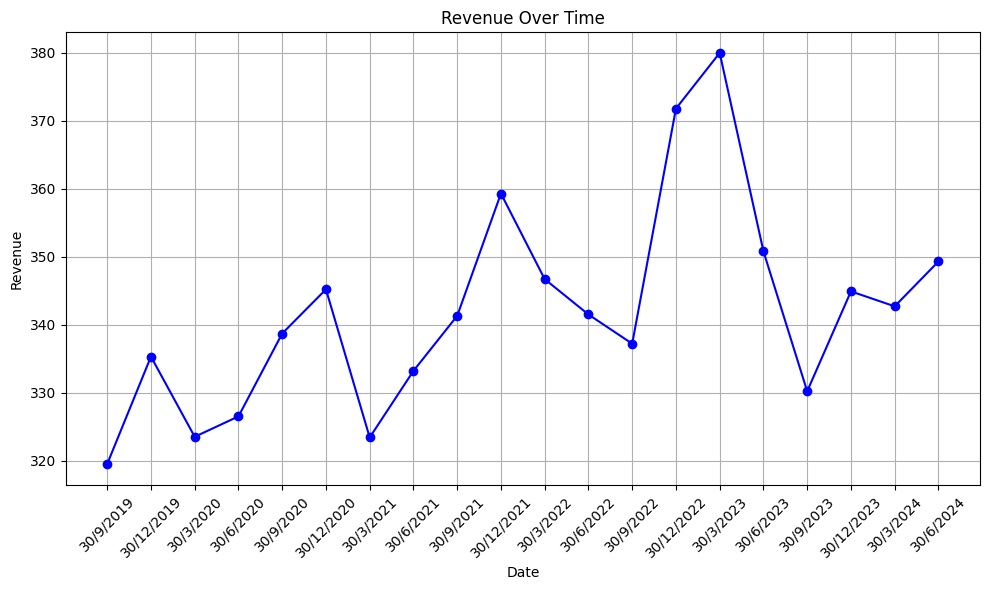

In [50]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(maybank_rev['Date'], maybank_rev['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                              Revenue   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -78.932
Date:                              Wed, 16 Oct 2024   AIC                            161.864
Time:                                      12:11:45   BIC                            163.753
Sample:                                           0   HQIC                           162.184
                                               - 20                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.1428      0.454      0.315      0.753      -0.747       1.032
sigma2       234.60

C:\Users\USER\anaconda3\envs\experian\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


InvalidIndexError: (slice(None, None, None), 0)

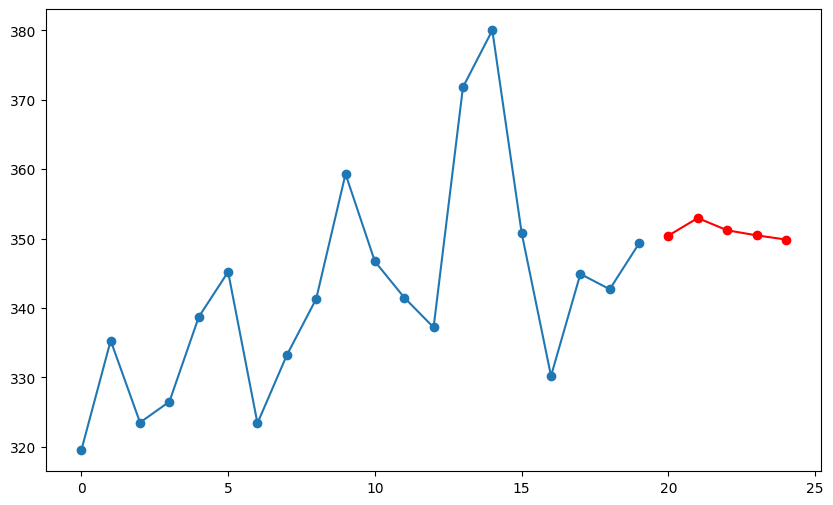

In [55]:
# Fit SARIMAX with (0,1,0) for ARIMA and (0,0,1) for seasonal component
model = SARIMAX(maybank_rev['Revenue'], order=(0,1,0), seasonal_order=(0,0,1,12))
model_fit = model.fit()

# Model summary
print(model_fit.summary())

# Plotting the forecast for visualization
forecast = model_fit.get_forecast(steps=5)  # Forecast 5 steps ahead
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(maybank_rev['Revenue'], label='Original Data', marker='o')
plt.plot(range(len(maybank_rev['Revenue']), len(maybank_rev['Revenue']) + 5), 
         forecast_values, label='Forecast', color='red', marker='o')
plt.fill_between(range(len(maybank_rev['Revenue']), len(maybank_rev['Revenue']) + 5), 
                 ci[:, 0], ci[:, 1], color='pink', alpha=0.3)

# Add labels and title
plt.title('Revenue Forecast using SARIMAX (0,1,0)(0,0,1)[12]', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Revenue (in millions)', fontsize=12)

# Display the legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    lower Revenue  upper Revenue
20     318.935361     379.664639
21     306.357916     392.242084
22     296.706903     401.893097
23     288.570722     410.029278
24     281.402603     417.197397


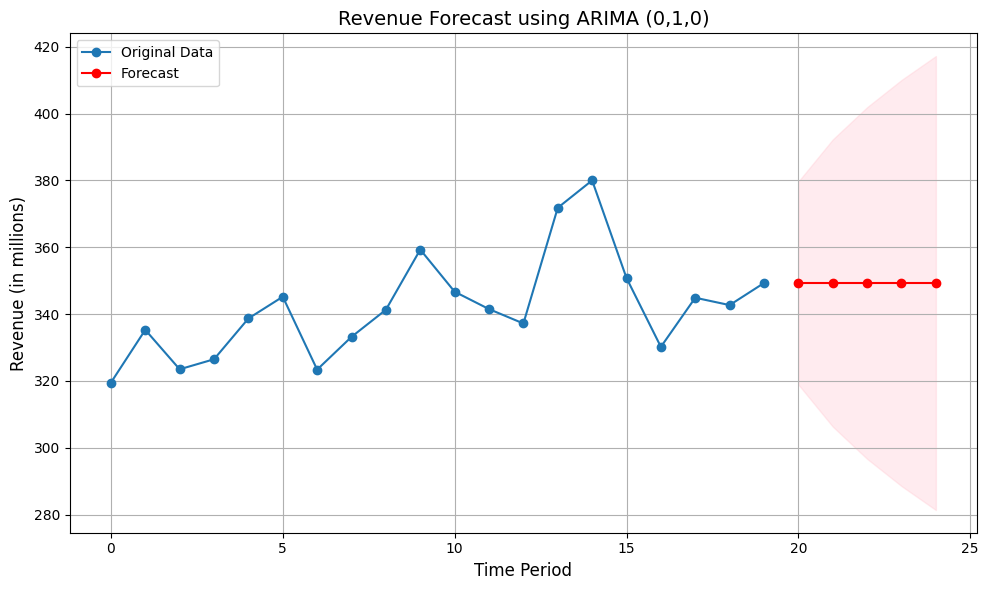

In [57]:
# Fit SARIMAX with non-seasonal ARIMA (0,1,0)
model = SARIMAX(maybank_rev['Revenue'], order=(0,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit()

# Check the confidence intervals
forecast = model_fit.get_forecast(steps=5)
ci = forecast.conf_int()

# Ensure 'ci' is correctly formatted
print(ci)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(maybank_rev['Revenue'], label='Original Data', marker='o')
plt.plot(range(len(maybank_rev['Revenue']), len(maybank_rev['Revenue']) + 5), forecast.predicted_mean, label='Forecast', color='red', marker='o')
plt.fill_between(range(len(maybank_rev['Revenue']), len(maybank_rev['Revenue']) + 5), ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3)

# Add labels and title
plt.title('Revenue Forecast using ARIMA (0,1,0)', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Revenue (in millions)', fontsize=12)

# Display the legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Net Profit

In [58]:
maybank_np = maybank[['Date','Net Profit']]

In [59]:
maybank_np

,Date,Net Profit
0,30/9/2019,134.5
1,30/12/2019,140.3
2,30/3/2020,141.3
3,30/6/2020,157.4
4,30/9/2020,177.1
5,30/12/2020,158.2
6,30/3/2021,171.9
7,30/6/2021,144.4
8,30/9/2021,189.5
9,30/12/2021,147.6


                                      SARIMAX Results                                      
Dep. Variable:                          Net Profit   No. Observations:                   20
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 4)   Log Likelihood                 -79.457
Date:                             Wed, 16 Oct 2024   AIC                            164.913
Time:                                     12:21:45   BIC                            167.747
Sample:                                          0   HQIC                           165.393
                                              - 20                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4959      0.182     -2.725      0.006      -0.853      -0.139
ma.S.L4        0.7376      

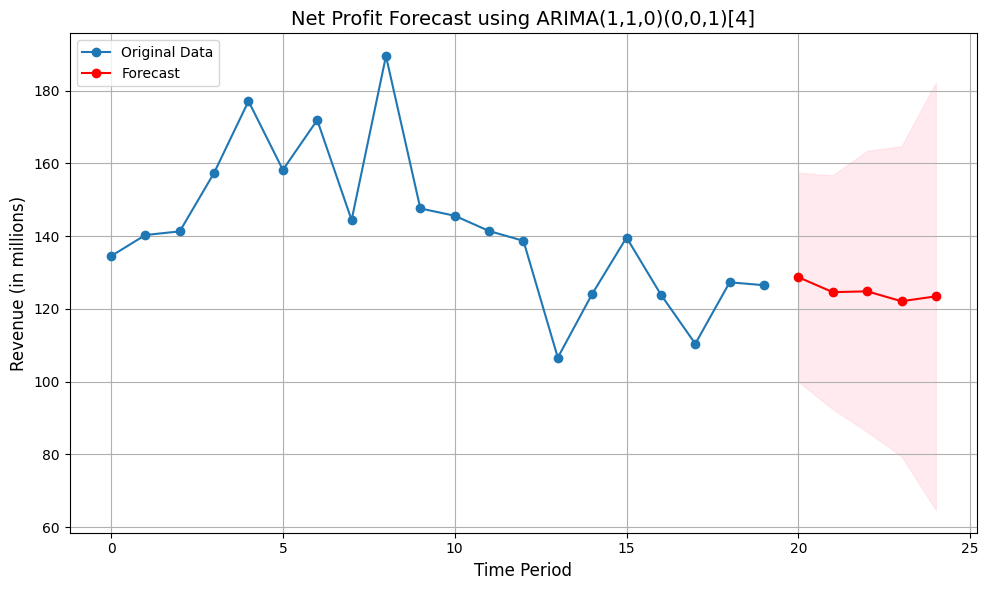

In [61]:
# Assuming 'maybank_rev' DataFrame with 'Revenue' column is already available
# Fit SARIMAX model with ARIMA(1,1,0) and seasonal (0,0,1)[4]
model = SARIMAX(maybank_np['Net Profit'], order=(1, 1, 0), seasonal_order=(0, 0, 1, 4))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get forecast for the next 5 time steps
forecast = model_fit.get_forecast(steps=5)
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(maybank_np['Net Profit'], label='Original Data', marker='o')
plt.plot(range(len(maybank_np['Net Profit']), len(maybank_np['Net Profit']) + 5), forecast_values, label='Forecast', color='red', marker='o')
plt.fill_between(range(len(maybank_np['Net Profit']), len(maybank_np['Net Profit']) + 5), ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3)

# Add labels and title
plt.title('Net Profit Forecast using ARIMA(1,1,0)(0,0,1)[4]', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Revenue (in millions)', fontsize=12)

# Display the legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# total laibilities

In [67]:
maybank_tl = maybank[['Date','Total Liabilities']]
maybank_tl['Total Liabilities'] = pd.to_numeric(maybank_tl['Total Liabilities'], errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_17360\2188320846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maybank_tl['Total Liabilities'] = pd.to_numeric(maybank_tl['Total Liabilities'], errors='coerce')


In [65]:
maybank_tl

,Date,Total Liabilities
0,30/9/2019,"1,383.40"
1,30/12/2019,"1,470.50"
2,30/3/2020,"1,424.10"
3,30/6/2020,"1,423.20"
4,30/9/2020,"1,439.60"
5,30/12/2020,"1,336.50"
6,30/3/2021,"1,268.50"
7,30/6/2021,"1,320.40"
8,30/9/2021,"1,347.70"
9,30/12/2021,"1,403.30"
